# Import Libraries

In [344]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [345]:
df_or = pd.read_csv('datasets/OrderReports.csv')
display(df_or.head())

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender
0,2023-10-26 14:50:17,16698.0,RM57.80,processing,AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN,new,"1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...",2.0,49.8,Perak,36,F
1,2023-10-26 13:53:47,16697.0,RM32.90,processing,Ja Hasim,new,1× LIP BOOSTER - MELON,1.0,24.9,Johor,25,F
2,2023-10-26 13:04:17,16696.0,RM32.90,processing,nasy anis,new,1× LIP BOOSTER - MELON,1.0,24.9,Melaka,31,F
3,2023-10-26 13:00:49,16695.0,RM82.70,processing,Herny erdawati binti Mohamad Rashed,new,"1× LIP BOOSTER - STRAWBERRY, 2× LIP BOOSTER - ...",3.0,74.7,Kelantan,31,F
4,2023-10-26 12:47:36,16694.0,RM32.90,processing,Suhaina Sulaiman,new,1× LIP BOOSTER - WATERMELON,1.0,24.9,Perlis,38,F


In [346]:
df_pl = pd.read_csv('datasets/ProductList.csv')
display(df_pl.head())

,Product,SKU,Items sold,N. Revenue,Orders,Status,Stock
0,LIP BOOSTER - WATERMELON,00597,2590,63270.9,2299,In stock,11
1,LIP BOOSTER - STRAWBERRY,00602,2563,63768.9,2280,In stock,134
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,00608,1067,7435.1,1005,In stock,33
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,00607,728,7135.7,690,In stock,41
4,LIP BOOSTER - MELON,00610,651,16209.9,587,In stock,177


In [347]:
df_rr = pd.read_csv('datasets/RevenueReport.csv')
display(df_rr.head())

,Date,Orders,Gross sales,Returns,Coupons,Net sales,Taxes,Shipping,Total sales
0,2023-10-26 00:00:00,12,917.7,0.0,0.0,917.7,0.0,100.0,1017.7
1,2023-10-25 00:00:00,31,1664.7,0.0,0.0,1664.7,0.0,264.0,1928.7
2,2023-10-24 00:00:00,11,803.0,0.0,0.0,803.0,0.0,96.0,899.0
3,2023-10-23 00:00:00,16,867.5,0.0,0.0,867.5,0.0,136.0,1003.5
4,2023-10-22 00:00:00,17,986.9,0.0,0.0,986.9,0.0,144.0,1130.9


In [348]:
df_wb = pd.read_csv('datasets/website_bestsellers.csv')
display(df_wb.head())

,product_name,product_price
0,LIP BOOSTER,24.9
1,COLLAGEN SERUM FOUNDATION ALHA ALFA,49.9
2,SET DIMENSI ALHA ALFA,79.9
3,MAGIC GLOW LIP TREATMENT OIL,24.9
4,ROYAL PROPOLIS POWDER FOUNDATION,59.9


In [349]:
df_ttb = pd.read_csv('datasets/tiktok_bestsellers.csv')
display(df_ttb.head())

,product_name,product_price,items_sold,rating,rating_count
0,ALHA ALFA LIP BOOSTER SERUM Lips,24.9,104400,4.9,27000
1,ALHA ALFA MAGIC GLOW LIP TREATMENT OIL,24.9,35400,4.8,8800
2,ALHA ALFA ROYAL PROPOLIS FOUNDATION PERFECT GLOW,69.9,30400,4.9,8300
3,ALHA ALFA COMPACT POWDER ROYAL PROPOLIS FOUNDA...,59.9,27400,4.9,27600
4,ALHA ALFA SETTING SPRAY MAKEUP,59.9,23500,4.9,6400


# Identifying and Handling Missing Values, Duplicate Data, and Incorrect Data Types

## Find out the number of rows and columns in each dataset


In [350]:
display("OrderReport: ", df_or.shape)
display("ProductList: ", df_pl.shape)
display("RevenueReport: ", df_rr.shape)
display("WebsiteBestsellers: ", df_wb.shape)
display("TiktokBestsellers: ", df_ttb.shape)

'OrderReport: '

(8014, 12)

'ProductList: '

(111, 7)

'RevenueReport: '

(299, 9)

'WebsiteBestsellers: '

(37, 2)

'TiktokBestsellers: '

(23, 5)

## Find out the number of missing values in each dataset

In [351]:
display("OrderReport:", df_or.isnull().sum())
display("ProductList:", df_pl.isnull().sum())
display("RevenueReport:", df_rr.isnull().sum())
display("WebsiteBestsellers:", df_wb.isnull().sum())
display("TiktokBestsellers:", df_ttb.isnull().sum())

'OrderReport:'

Date                      0
Order #                   0
N. Revenue (formatted)    0
Status                    0
Customer                  0
Customer type             0
Product(s)                0
Items sold                0
N. Revenue                0
State                     0
Age                       0
Gender                    0
dtype: int64

'ProductList:'

Product       0
SKU           0
Items sold    0
N. Revenue    0
Orders        0
Status        0
Stock         0
dtype: int64

'RevenueReport:'

Date           0
Orders         0
Gross sales    0
Returns        0
Coupons        0
Net sales      0
Taxes          0
Shipping       0
Total sales    0
dtype: int64

'WebsiteBestsellers:'

product_name     0
product_price    0
dtype: int64

'TiktokBestsellers:'

product_name     0
product_price    0
items_sold       0
rating           0
rating_count     0
dtype: int64

## Find out the data types of each column in each dataset

In [352]:
display("OrderReport:", df_or.dtypes)
display("ProductList:", df_pl.dtypes)
display("RevenueReport:", df_rr.dtypes)
display("WebsiteBestsellers:", df_wb.dtypes)
display("TiktokBestsellers:", df_ttb.dtypes)

'OrderReport:'

Date                       object
Order #                   float64
N. Revenue (formatted)     object
Status                     object
Customer                   object
Customer type              object
Product(s)                 object
Items sold                float64
N. Revenue                float64
State                      object
Age                         int64
Gender                     object
dtype: object

'ProductList:'

Product        object
SKU            object
Items sold      int64
N. Revenue    float64
Orders          int64
Status         object
Stock           int64
dtype: object

'RevenueReport:'

Date            object
Orders           int64
Gross sales    float64
Returns        float64
Coupons        float64
Net sales      float64
Taxes          float64
Shipping       float64
Total sales    float64
dtype: object

'WebsiteBestsellers:'

product_name      object
product_price    float64
dtype: object

'TiktokBestsellers:'

product_name      object
product_price    float64
items_sold         int64
rating           float64
rating_count       int64
dtype: object

## Find out the number of duplicate rows in each dataset

In [353]:
print("OrderReport: ", df_or.duplicated().sum())
print("ProductList: ", df_pl.duplicated().sum())
print("RevenueReport: ", df_rr.duplicated().sum())
print("WebsiteBestsellers: ", df_wb.duplicated().sum())
print("TiktokBestsellers: ", df_ttb.duplicated().sum())

OrderReport:  0
ProductList:  0
RevenueReport:  0
WebsiteBestsellers:  0
TiktokBestsellers:  0


## Check Empty SKU in ProductList dataset


In [354]:
print(df_pl[df_pl['SKU'].isnull()])

Empty DataFrame
Columns: [Product, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


## Assign a random SKU to the empty SKU

In [355]:
random_sku = np.random.randint(10000, 99999)
while random_sku in df_pl['SKU']:
    random_sku = np.random.randint(10000, 99999)
    
df_pl['SKU'] = df_pl['SKU'].fillna(random_sku)
print(df_pl[df_pl['SKU'].isnull()])

# save to csv
df_pl.to_csv('datasets/ProductList.csv', index=False)

Empty DataFrame
Columns: [Product, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


# Data Augmentation

## Add a new column to the OrderReport dataset called 'State' and populate it with random states

In [356]:
# Malaysian States
states = ['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Penang', 'Perak', 'Perlis', 'Putrajaya', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'WP Kuala Lumpur']

# states distribution
states_distribution = {
    'Johor': 0.6,
    'Kedah': 0.5,
    'Kelantan': 0.5,
    'Labuan': 0.01,
    'Melaka': 0.6,
    'Negeri Sembilan': 0.6,
    'Pahang': 0.4,
    'Penang': 0.3,
    'Perak': 0.4,
    'Perlis': 0.5,
    'Putrajaya': 0.06,
    'Sabah': 0.02,
    'Sarawak': 0.02,
    'Selangor': 0.8,
    'Terengganu': 0.4,
    'WP Kuala Lumpur': 0.2
}

# Initialize random number generator with a fixed seed for consistency
random.seed(42)

# Sample the same number of states as rows in your existing dataset
existing_rows = len(df_or)
sampled_states = random.choices(states, weights=states_distribution.values(), k=existing_rows)
# Assign the sampled states to your existing DataFrame
df_or['State'] = sampled_states

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

## Adding a new column called to the OrderReport dataset called 'Age' and populate it with random ages

In [357]:
age_distribution = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
# the percentage of customers in each age group
age_distribution_percentage = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                               0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # 100%

random.seed(42)

# Sample the same number of customers as rows in your existing dataset
existing_rows = len(df_or)
sampled_age = random.choices(age_distribution, weights=age_distribution_percentage, k=existing_rows)

# Assign the sampled age to your existing DataFrame
df_or['Age'] = sampled_age

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

display(df_or.head())
display(df_or['Age'].value_counts())

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender
0,2023-10-26 14:50:17,16698.0,RM57.80,processing,AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN,new,"1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...",2.0,49.8,Perak,36,F
1,2023-10-26 13:53:47,16697.0,RM32.90,processing,Ja Hasim,new,1× LIP BOOSTER - MELON,1.0,24.9,Johor,25,F
2,2023-10-26 13:04:17,16696.0,RM32.90,processing,nasy anis,new,1× LIP BOOSTER - MELON,1.0,24.9,Melaka,31,F
3,2023-10-26 13:00:49,16695.0,RM82.70,processing,Herny erdawati binti Mohamad Rashed,new,"1× LIP BOOSTER - STRAWBERRY, 2× LIP BOOSTER - ...",3.0,74.7,Kelantan,31,F
4,2023-10-26 12:47:36,16694.0,RM32.90,processing,Suhaina Sulaiman,new,1× LIP BOOSTER - WATERMELON,1.0,24.9,Perlis,38,F


36    618
34    611
32    608
35    593
33    575
31    573
37    336
28    315
27    312
45    306
40    305
41    304
26    300
29    297
38    296
39    288
42    286
30    283
44    282
25    265
43    261
Name: Age, dtype: int64

## Creating a Machine Learning Model using Logistic Regression to predict gender of names

In [358]:
# df_mn = pd.read_csv('datasets/MalaysianNames_clean.csv')
# 
# name_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
# name_features = name_vectorizer.fit_transform(df_mn['name'])
# 
# label_encoder = LabelEncoder()
# df_mn["gender"] = label_encoder.fit_transform(df_mn["gender"])
# 
# X_train, X_test, y_train, y_test = train_test_split(name_features, df_mn["gender"], test_size=0.2, random_state=42)
# 
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# 
# accuracy = accuracy_score(y_test, y_pred)
# 
# print(f"Model Accuracy: {accuracy}")
# 
# new_names = df_or['Customer'].tolist()
# # new_names = ['Lee Mann Heyy']
# new_name_features = name_vectorizer.transform(new_names)
# new_name_features = new_name_features.toarray()
# 
# # predict gender of new names
# new_names_pred = model.predict(new_name_features)
# new_names_pred = label_encoder.inverse_transform(new_names_pred)
# print(new_names_pred)
# 
# #print total number of M and F in the list
# print("Total number of M: ", new_names_pred.tolist().count('M'))
# print("Total number of F: ", new_names_pred.tolist().count('F'))
display(df_or['Gender'].value_counts())

F    7829
M     185
Name: Gender, dtype: int64

# Encoding Categorical Data

## For OrderReport dataset

In [359]:
lb = LabelBinarizer()
df_or['Customer type enc'] = lb.fit_transform(df_or['Customer type'])
df_or['Gender_enc'] = lb.fit_transform(df_or['Gender'])

le = LabelEncoder()
df_or['State_enc'] = le.fit_transform(df_or['State'])
display(df_or.head())

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender,Customer type enc,Gender_enc,State_enc
0,2023-10-26 14:50:17,16698.0,RM57.80,processing,AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN,new,"1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...",2.0,49.8,Perak,36,F,0,0,8
1,2023-10-26 13:53:47,16697.0,RM32.90,processing,Ja Hasim,new,1× LIP BOOSTER - MELON,1.0,24.9,Johor,25,F,0,0,0
2,2023-10-26 13:04:17,16696.0,RM32.90,processing,nasy anis,new,1× LIP BOOSTER - MELON,1.0,24.9,Melaka,31,F,0,0,4
3,2023-10-26 13:00:49,16695.0,RM82.70,processing,Herny erdawati binti Mohamad Rashed,new,"1× LIP BOOSTER - STRAWBERRY, 2× LIP BOOSTER - ...",3.0,74.7,Kelantan,31,F,0,0,2
4,2023-10-26 12:47:36,16694.0,RM32.90,processing,Suhaina Sulaiman,new,1× LIP BOOSTER - WATERMELON,1.0,24.9,Perlis,38,F,0,0,9


## For ProductList dataset

In [360]:
lb = LabelBinarizer()
df_pl['Status enc'] = lb.fit_transform(df_pl['Status'])

le = LabelEncoder()
df_pl['SKU'] = le.fit_transform(df_pl['SKU'])

display(df_pl.head())

,Product,SKU,Items sold,N. Revenue,Orders,Status,Stock,Status enc
0,LIP BOOSTER - WATERMELON,95,2590,63270.9,2299,In stock,11,0
1,LIP BOOSTER - STRAWBERRY,96,2563,63768.9,2280,In stock,134,0
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1067,7435.1,1005,In stock,33,0
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,728,7135.7,690,In stock,41,0
4,LIP BOOSTER - MELON,100,651,16209.9,587,In stock,177,0


# 1. Enhanced Targeted Advertising (Analysing Demographics)

## 1.1 Distribution of Customer's Age by State

### Split the dataset into training and testing set

In [361]:
data = df_or[['Customer type', 'Age', 'State']]
#encode State
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
#encode Customer type
lb = LabelBinarizer()
data['Customer type'] = lb.fit_transform(data['Customer type'])

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)    

### Train the model using DBSCAN

In [362]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# print(kmeans.fit(trainset))
# # predict the clusters for the testset
# y_pred = kmeans.predict(testset)

In [363]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
display(dbscan.fit(trainset))

DBSCAN()

### Predict the clusters for the training set

In [364]:
y_pred = dbscan.fit_predict(testset)
print(y_pred)

[ 0  1  2 ...  5 10 10]


### Visualize the clusters

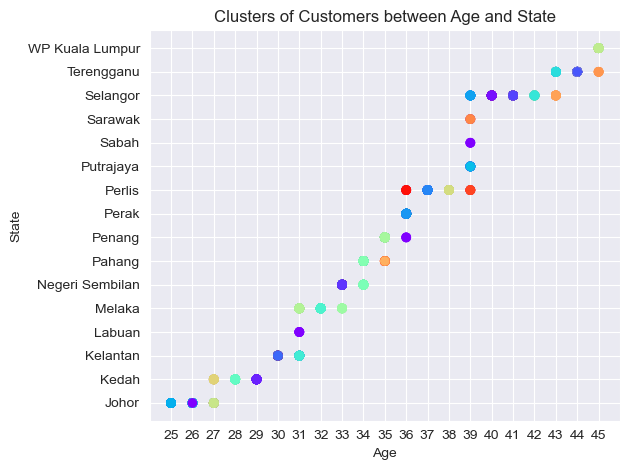

In [365]:
plt.scatter(testset['Age'], testset['State'], c=y_pred, cmap='rainbow')
plt.title('Clusters of Customers between Age and State')
plt.yticks(np.arange(0, 16), le.inverse_transform(np.arange(0, 16)))
plt.xticks(np.arange(25, 46))
plt.xlabel('Age')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Current Average Age at each State

In [366]:
#unencode State
for i in range(0, 16):
    test_age = int(testset[testset['State'] == i]['Age'].mean())
    state = le.inverse_transform([i])
    state = state[0]
    print(f"State {state}'s average age = {test_age}")

State Johor's average age = 25
State Kedah's average age = 28
State Kelantan's average age = 30
State Labuan's average age = 31
State Melaka's average age = 31
State Negeri Sembilan's average age = 33
State Pahang's average age = 34
State Penang's average age = 35
State Perak's average age = 36
State Perlis's average age = 37
State Putrajaya's average age = 39
State Sabah's average age = 39
State Sarawak's average age = 39
State Selangor's average age = 40
State Terengganu's average age = 43
State WP Kuala Lumpur's average age = 45


### Predict the average age for the next 3 years


In [367]:
for i in range(0, 16):
    test_age = int(testset[testset['State'] == i]['Age'].mean())
    state = le.inverse_transform([i])
    state = state[0]
    age_percentage = random.uniform(1.0, 1.2)
    test_age = int(test_age * age_percentage)
    print(f"State {state}'s average age = {test_age}")


State Johor's average age = 25
State Kedah's average age = 28
State Kelantan's average age = 34
State Labuan's average age = 31
State Melaka's average age = 34
State Negeri Sembilan's average age = 39
State Pahang's average age = 34
State Penang's average age = 38
State Perak's average age = 36
State Perlis's average age = 41
State Putrajaya's average age = 46
State Sabah's average age = 44
State Sarawak's average age = 46
State Selangor's average age = 43
State Terengganu's average age = 45
State WP Kuala Lumpur's average age = 48


### Evaluate the model using Silhouette Score

In [368]:
print(silhouette_score(testset, y_pred))

0.9365001452004044


## 1.2 Distribution of Total Items Sold by State

### Sales by State

In [369]:
df_or['Items sold'] = df_or['Items sold'].astype(int)
total_sales_by_state = df_or.groupby('State')['Items sold'].sum().reset_index()

for index, row in total_sales_by_state.iterrows():
    state = row['State']
    total_items_sold = row['Items sold']
    print(f"State {state} total sales = {total_items_sold}")

State Johor total sales = 1604
State Kedah total sales = 1401
State Kelantan total sales = 1219
State Labuan total sales = 23
State Melaka total sales = 1708
State Negeri Sembilan total sales = 1566
State Pahang total sales = 1221
State Penang total sales = 753
State Perak total sales = 1086
State Perlis total sales = 1419
State Putrajaya total sales = 165
State Sabah total sales = 44
State Sarawak total sales = 49
State Selangor total sales = 2159
State Terengganu total sales = 1036
State WP Kuala Lumpur total sales = 569


### Visualize the distribution of total items sold by state (SKIP)

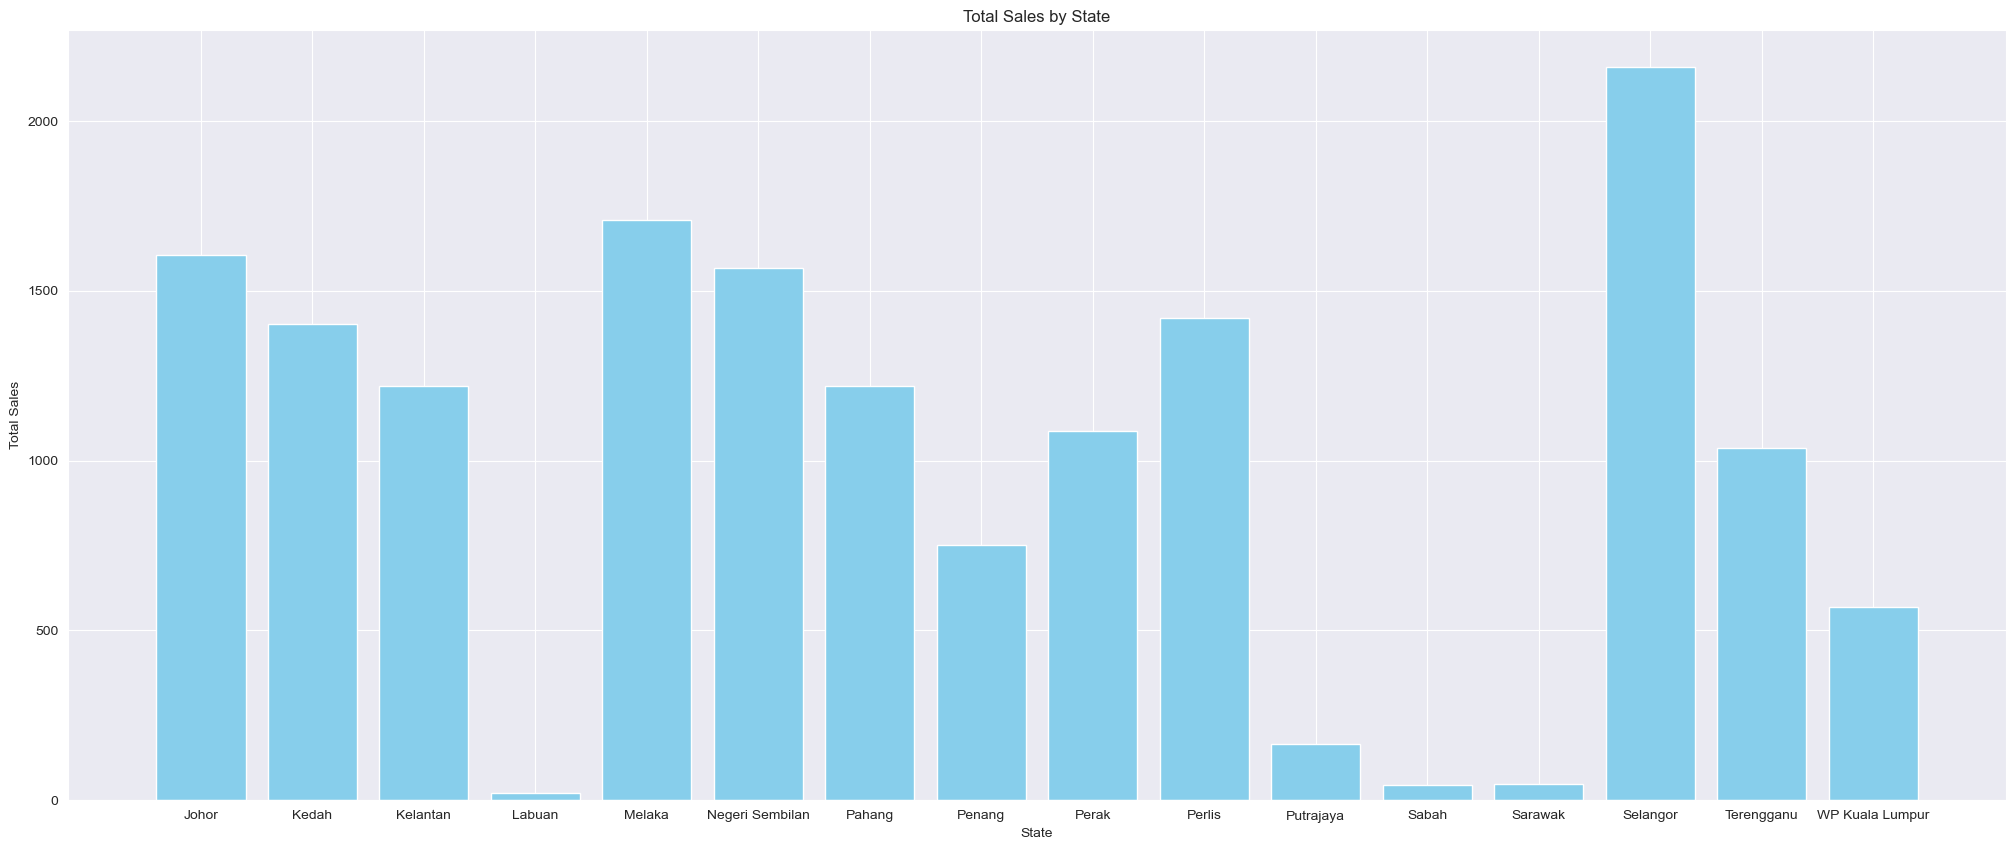

In [370]:
plt.figure(figsize=(25, 10))
plt.bar(total_sales_by_state['State'], total_sales_by_state['Items sold'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.show()

## 1.3 Distribution of Total Revenue by State

In [371]:
df_or['N. Revenue (formatted)'] = df_or['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)
total_revenue_by_state = df_or.groupby('State')['N. Revenue (formatted)'].sum().reset_index()

for index, row in total_revenue_by_state.iterrows():
    state = row['State']
    total_revenue = row['N. Revenue (formatted)']
    print(f"State {state} total revenue = {total_revenue}")


State Johor total revenue = 55258.8
State Kedah total revenue = 46232.2
State Kelantan total revenue = 41770.5
State Labuan total revenue = 865.1
State Melaka total revenue = 56761.1
State Negeri Sembilan total revenue = 53255.6
State Pahang total revenue = 41644.8
State Penang total revenue = 25257.9
State Perak total revenue = 37586.7
State Perlis total revenue = 47355.8
State Putrajaya total revenue = 5573.1
State Sabah total revenue = 1513.6
State Sarawak total revenue = 1450.8
State Selangor total revenue = 74012.8
State Terengganu total revenue = 35559.0
State WP Kuala Lumpur total revenue = 18583.5


### Visualize the distribution of total revenue by state

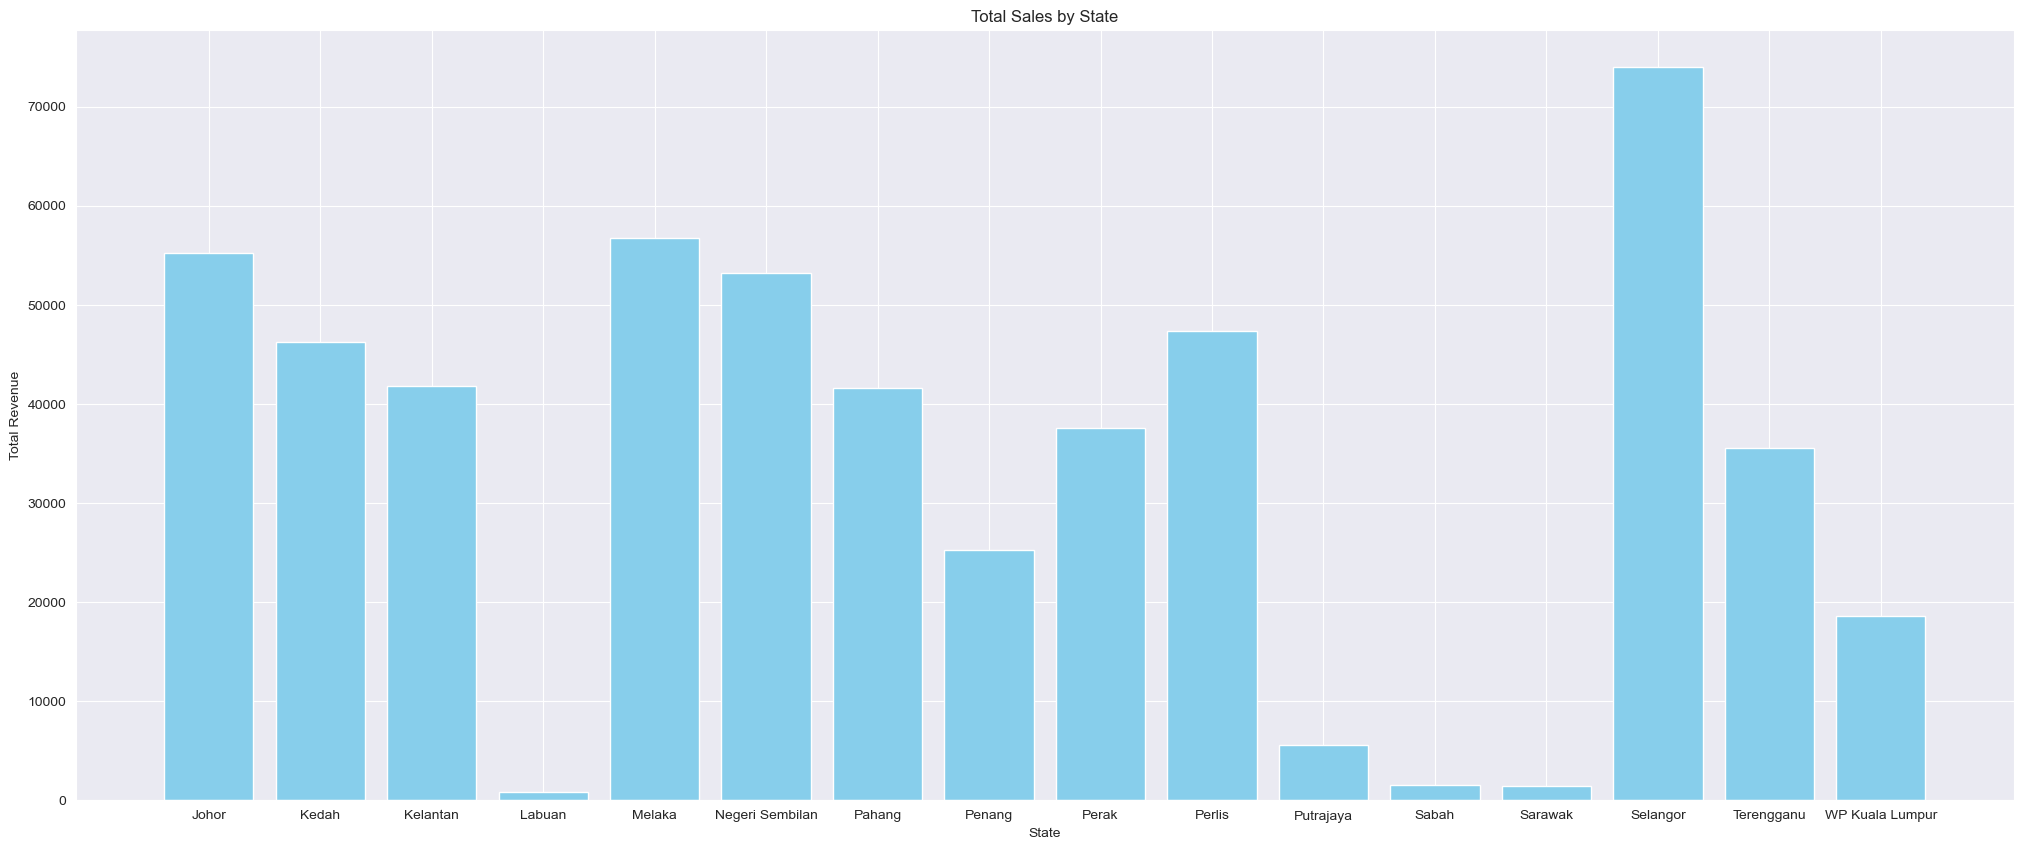

In [372]:
plt.figure(figsize=(25, 10))
plt.bar(total_revenue_by_state['State'], total_revenue_by_state['N. Revenue (formatted)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Total Sales by State')
plt.show()

## 1.4 Distribution of Total Items Sold by Age (SKIP)

In [373]:
age = df_or['Age']
total_sales_by_age = df_or.groupby('Age')['Items sold'].sum().reset_index()

for index, row in total_sales_by_age.iterrows():
    ages = row['Age']
    total_items_sold = row['Items sold']
    print(f"Age {ages} total sales = {total_items_sold}")

Age 25 total sales = 506
Age 26 total sales = 632
Age 27 total sales = 622
Age 28 total sales = 661
Age 29 total sales = 560
Age 30 total sales = 526
Age 31 total sales = 1175
Age 32 total sales = 1209
Age 33 total sales = 1124
Age 34 total sales = 1357
Age 35 total sales = 1108
Age 36 total sales = 1181
Age 37 total sales = 683
Age 38 total sales = 573
Age 39 total sales = 564
Age 40 total sales = 607
Age 41 total sales = 653
Age 42 total sales = 567
Age 43 total sales = 514
Age 44 total sales = 578
Age 45 total sales = 622


### Visualize the distribution of total items sold by age

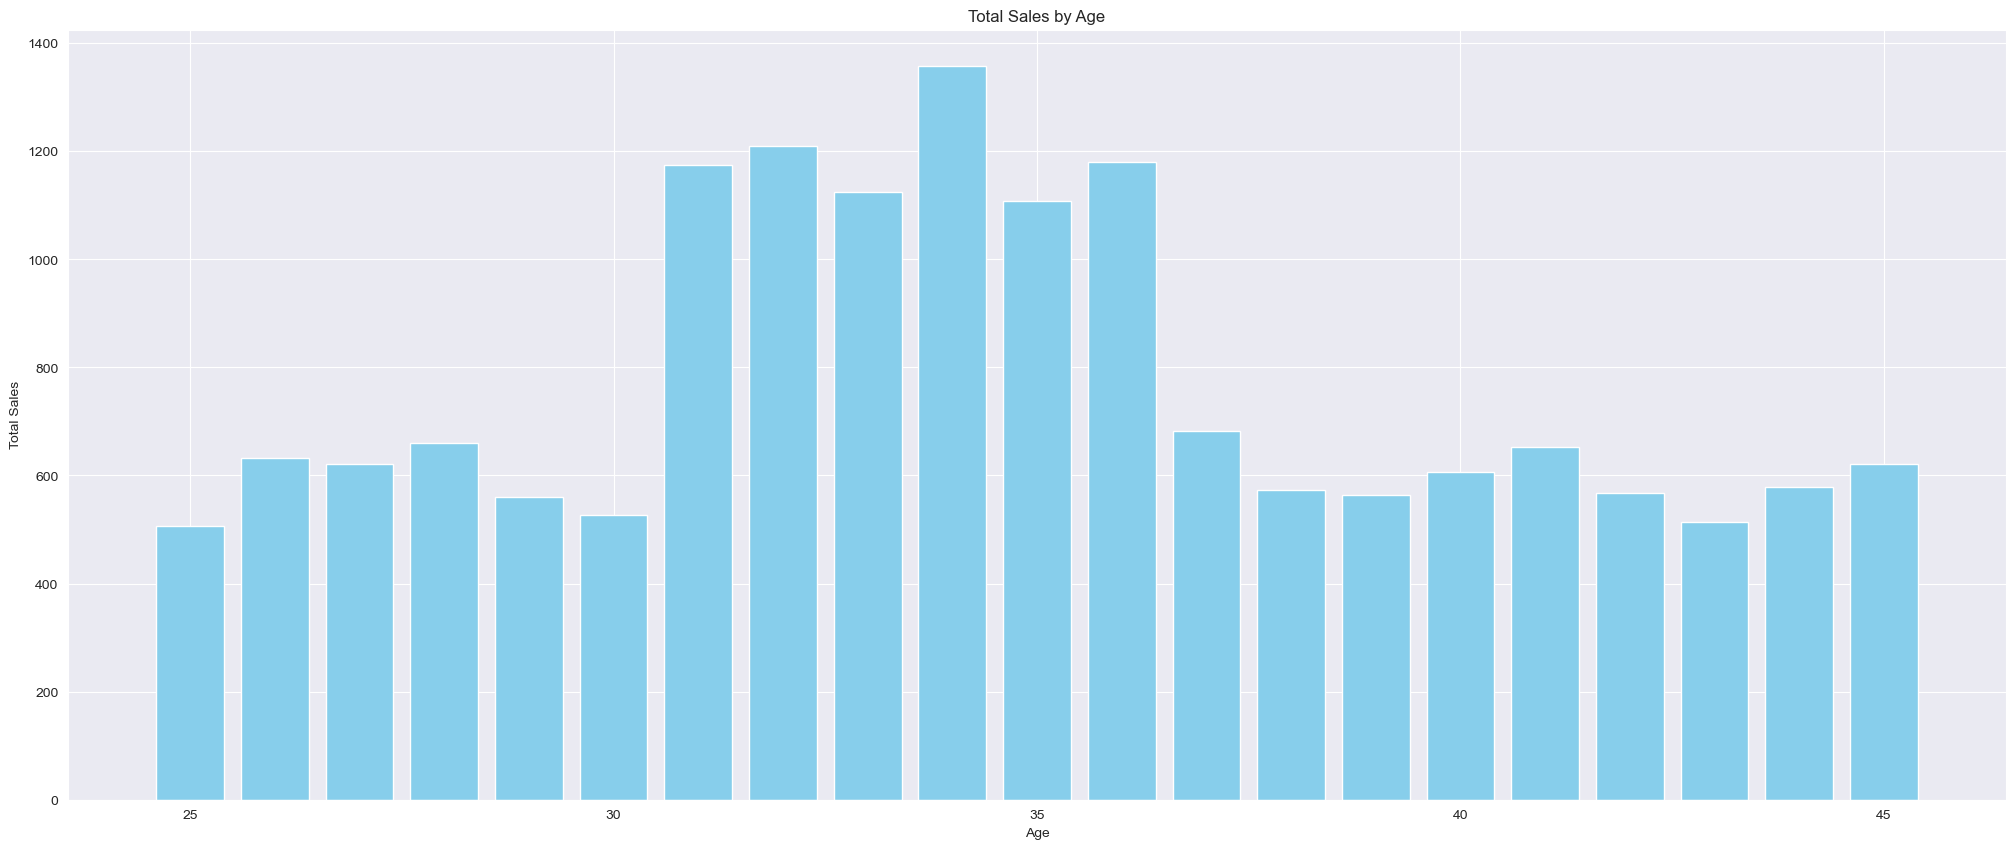

In [374]:
plt.figure(figsize=(25, 10))
plt.bar(total_sales_by_age['Age'], total_sales_by_age['Items sold'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age')
plt.show()

## 1.5 Distribution of Total Revenue by Age

In [375]:
total_revenue_by_age = df_or.groupby('Age')['N. Revenue (formatted)'].sum().reset_index()

for index, row in total_revenue_by_age.iterrows():
    ages = row['Age']
    total_revenue = row['N. Revenue (formatted)']
    print(f"Age {ages} total revenue = {total_revenue}")

Age 25.0 total revenue = 17287.2
Age 26.0 total revenue = 22251.6
Age 27.0 total revenue = 20833.3
Age 28.0 total revenue = 21431.7
Age 29.0 total revenue = 18614.1
Age 30.0 total revenue = 18703.5
Age 31.0 total revenue = 38814.4
Age 32.0 total revenue = 40808.8
Age 33.0 total revenue = 37656.5
Age 34.0 total revenue = 46811.2
Age 35.0 total revenue = 37360.0
Age 36.0 total revenue = 40687.2
Age 37.0 total revenue = 22876.5
Age 38.0 total revenue = 19077.2
Age 39.0 total revenue = 19419.4
Age 40.0 total revenue = 21768.6
Age 41.0 total revenue = 21706.4
Age 42.0 total revenue = 18988.0
Age 43.0 total revenue = 17098.7
Age 44.0 total revenue = 20082.2
Age 45.0 total revenue = 20404.8


### Visualize the distribution of total revenue by age

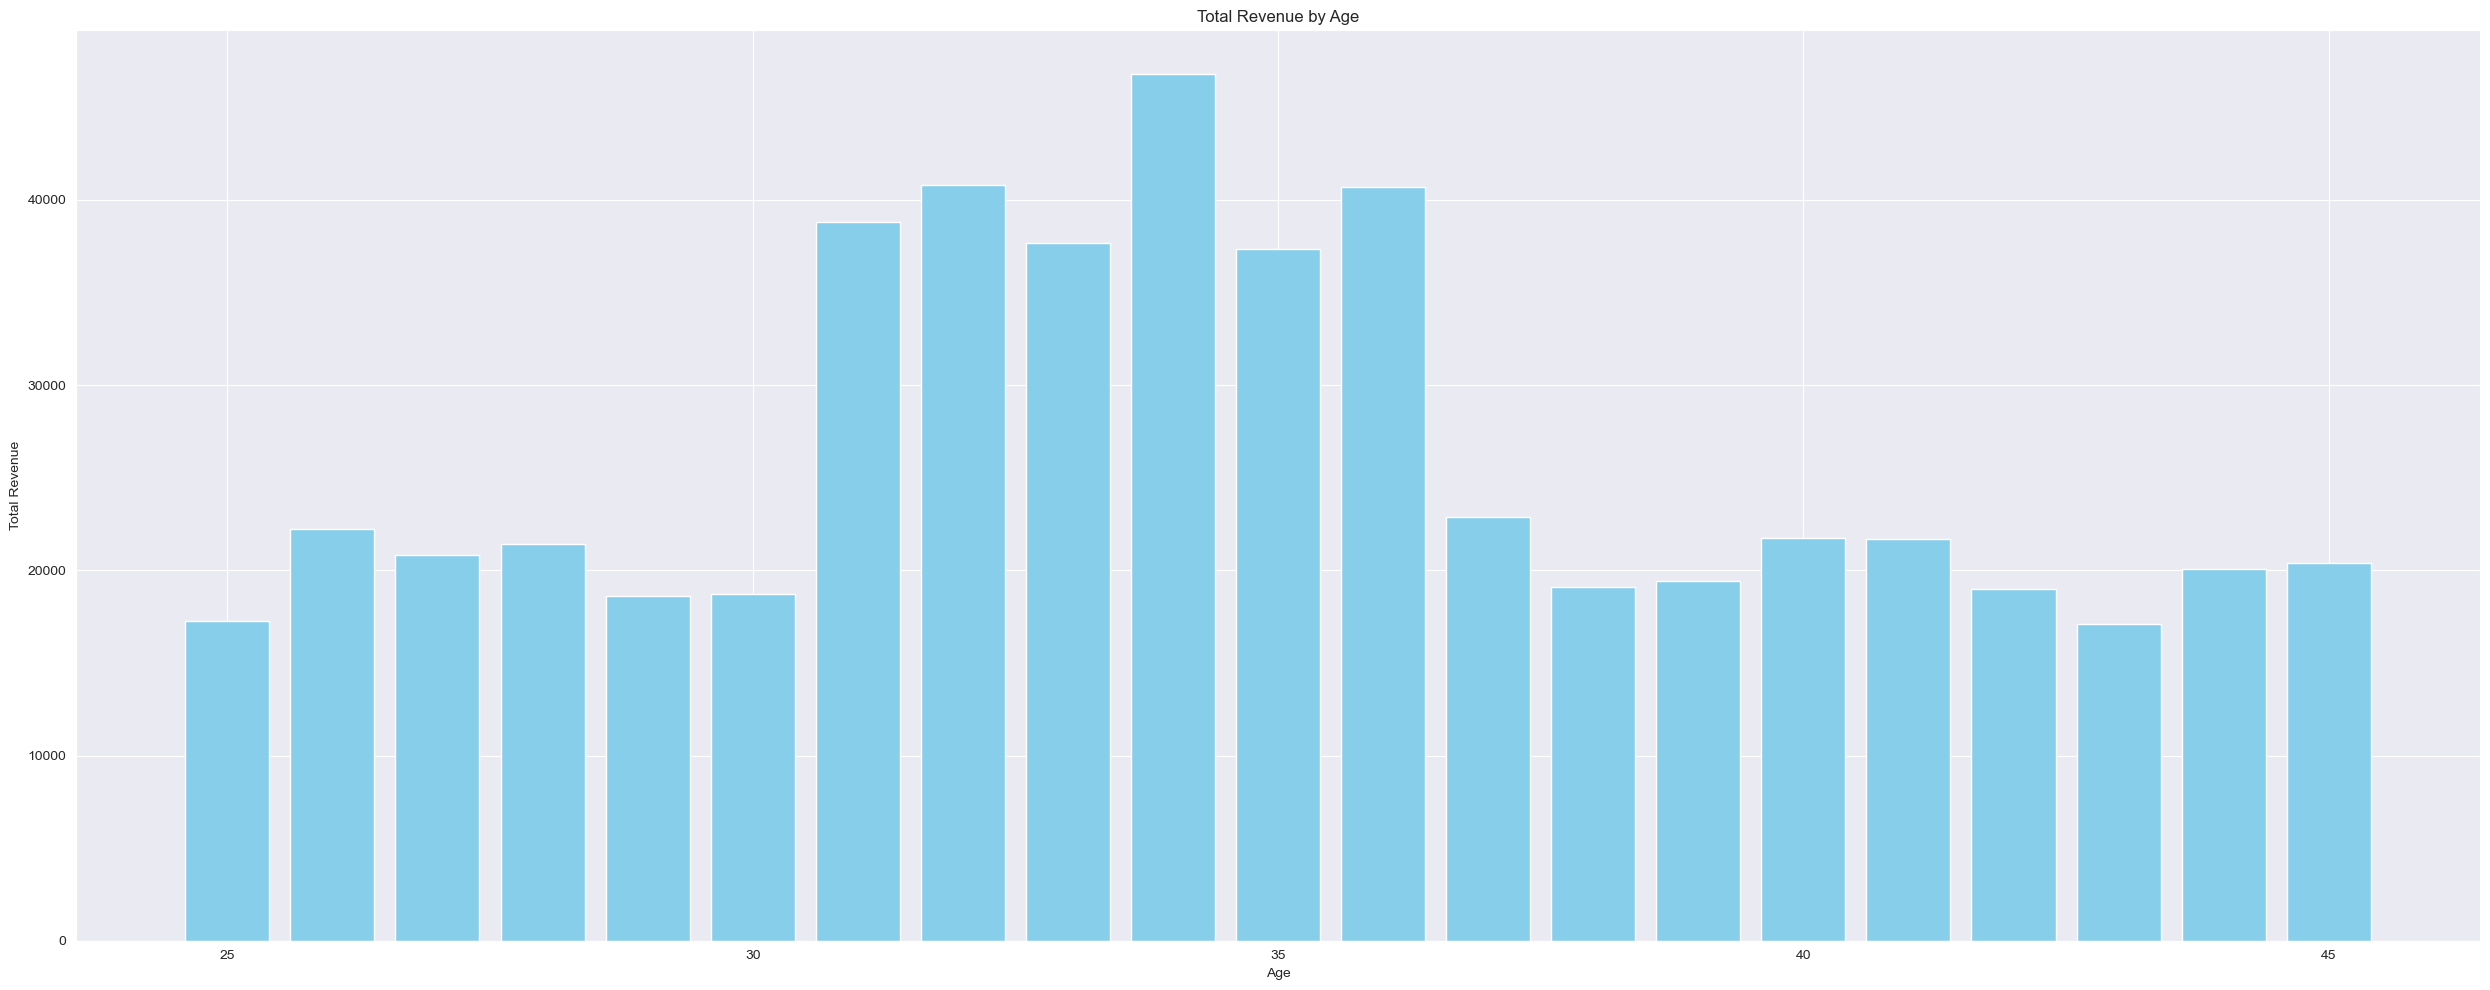

In [376]:
plt.figure(figsize=(25, 10))
plt.bar(total_revenue_by_age['Age'], total_revenue_by_age['N. Revenue (formatted)'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Age')
plt.tight_layout()
plt.show()

### Testing

In [377]:
import pandas as pd
from collections import defaultdict

# Load the dataset
data = pd.read_csv('datasets/OrderReports.csv') 

product_count = defaultdict(int)

# Iterate through each row in the dataset
for index, row in data.iterrows():
    products = row['Product(s)'].split(", ")
    
    # Counting product types in each row
    for product in products:
        parts = product.split("×")
        quantity = int(parts[0].strip())
        product_name = parts[1].strip()
        product_count[product_name] += quantity

# Printing the product count
print("Product Counts:")
for product, count in product_count.items():
    print(f"{product}: {count}")




Product Counts:
LIP BOOSTER - WATERMELON: 2590
LIP BOOSTER - STRAWBERRY: 2562
LIP BOOSTER - MELON: 651
ALHA ALFA SKIN BOOSTER: 372
MASCARA - Dimensional: 44
ROYAL PROPOLIS FOUNDATION SPF 45 - HONEY: 95
GLOW GLITTER SETTING SPRAY: 69
BRIGHT BOOST MOISTURIZER FACE CREAM: 100
PREBIOTIC UV SUNSCREEN: 57
LONG LASTING MAKEUP SETTING SPRAY - REAL GLOW: 48
ROYAL PROPOLIS FOUNDATION SPF 45 - LIGHT MEDIUM: 110
ROYAL PROPOLIS POWDER FOUNDATION - AA20 MEDIUM LIGHT: 220
ROYAL PROPOLIS FOUNDATION SPF 45 - WARM NATURAL: 19
SUPER STAY FIXING POWDER - MINI - TRANSLUCENT: 65
LONG LASTING MAKEUP SETTING SPRAY - REAL MATTE: 127
COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT: 728
CENTELLA SKIN BOOSTER: 106
COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM: 1067
ROYAL PROPOLIS POWDER FOUNDATION - AA30 NATURAL BEIGE: 274
SUPER STAY FIXING POWDER - MINI - BROWN: 9
HEART APPLICATOR SPONGE - PEACH: 7
MASCARA - Doll Eye: 72
SUPER STAY FIXING POWDER - BROWN: 31
ALHA ALFA FOGGY LIPS - MERLIN: 13
SATIN STAY SPF30 &amp; COM

## Testing 2

In [378]:
state_product_sales = defaultdict(lambda: defaultdict(int))

for index, row in data.iterrows():
    state = row['State']
    products = row['Product(s)'].split(",")
    
    for product in products:
        parts = product.split("×")
        quantity = int(parts[0].strip())
        product_name = parts[1].strip()
        state_product_sales[state][product_name] += quantity
        
best_product_per_state = {}

for state, product_sales in state_product_sales.items():
    best_product = max(product_sales, key=product_sales.get)
    best_product_per_state[state] = best_product
    
print("Best Product for Each State:")
for state, best_product in best_product_per_state.items():
     print(f"{state}: {best_product}")

Best Product for Each State:
Perak: LIP BOOSTER - STRAWBERRY
Johor: LIP BOOSTER - WATERMELON
Melaka: LIP BOOSTER - WATERMELON
Kelantan: LIP BOOSTER - WATERMELON
Perlis: LIP BOOSTER - WATERMELON
Selangor: LIP BOOSTER - STRAWBERRY
Negeri Sembilan: LIP BOOSTER - WATERMELON
Pahang: LIP BOOSTER - STRAWBERRY
Penang: LIP BOOSTER - STRAWBERRY
Kedah: LIP BOOSTER - STRAWBERRY
Terengganu: LIP BOOSTER - WATERMELON
WP Kuala Lumpur: LIP BOOSTER - WATERMELON
Sarawak: LIP BOOSTER - WATERMELON
Putrajaya: LIP BOOSTER - STRAWBERRY
Labuan: LIP BOOSTER - STRAWBERRY
Sabah: LIP BOOSTER - WATERMELON


## Test 3

In [379]:
import pandas as pd
from collections import defaultdict

age_product_sales = defaultdict(lambda: defaultdict(int))

# Iterate through each row in the dataset
for index, row in data.iterrows():
    age = row['Age']
    products = row['Product(s)'].split(", ")
    
    # Counting product types for each age
    for product in products:
        parts = product.split("×")
        quantity = int(parts[0].strip())
        product_name = parts[1].strip()
        age_product_sales[age][product_name] += quantity

# Finding the best product for each age
best_products_per_age = {}
for age, product_sales in age_product_sales.items():
    best_product = max(product_sales, key=product_sales.get)
    best_products_per_age[age] = best_product

# Printing the best product for each age
print("Best Product for Each Age:")
for age, best_product in best_products_per_age.items():
    print(f"{age}: {best_product}")

Best Product for Each Age:
36: LIP BOOSTER - STRAWBERRY
25: LIP BOOSTER - WATERMELON
31: LIP BOOSTER - STRAWBERRY
38: LIP BOOSTER - WATERMELON
37: LIP BOOSTER - WATERMELON
43: LIP BOOSTER - STRAWBERRY
27: LIP BOOSTER - STRAWBERRY
33: LIP BOOSTER - WATERMELON
30: LIP BOOSTER - WATERMELON
34: LIP BOOSTER - STRAWBERRY
35: LIP BOOSTER - STRAWBERRY
40: LIP BOOSTER - STRAWBERRY
32: LIP BOOSTER - WATERMELON
29: LIP BOOSTER - WATERMELON
44: LIP BOOSTER - WATERMELON
41: LIP BOOSTER - STRAWBERRY
45: LIP BOOSTER - WATERMELON
42: LIP BOOSTER - WATERMELON
26: LIP BOOSTER - STRAWBERRY
39: LIP BOOSTER - WATERMELON
28: LIP BOOSTER - STRAWBERRY


# each state what products bought and how much 

In [380]:
# What products are bought in each state and how many products
state_product_sales = defaultdict(lambda: defaultdict(int))

for index, row in data.iterrows():
    state = row['State']
    products = row['Product(s)'].split(",")
    
    for product in products:
        parts = product.split("×")
        quantity = int(parts[0].strip())
        product_name = parts[1].strip()
        state_product_sales[state][product_name] += quantity
        
all_products = set()
for state, product_sales in state_product_sales.items():
    for product in product_sales:
        all_products.add(product)
        
print("Product Counts:")
for product in all_products:
    print(f"{product}:")
    for state, product_sales in state_product_sales.items():
        print(f"\t{state}: {product_sales[product]}")
    

Product Counts:
SATIN STAY SPF30 &amp; COMPACT POWDER - CP30:
	Perak: 1
	Johor: 1
	Melaka: 0
	Kelantan: 0
	Perlis: 0
	Selangor: 0
	Negeri Sembilan: 3
	Pahang: 1
	Penang: 0
	Kedah: 0
	Terengganu: 0
	WP Kuala Lumpur: 0
	Sarawak: 0
	Putrajaya: 0
	Labuan: 0
	Sabah: 0
ROYAL PROPOLIS FOUNDATION SPF 45 - NATURAL:
	Perak: 2
	Johor: 12
	Melaka: 13
	Kelantan: 6
	Perlis: 3
	Selangor: 15
	Negeri Sembilan: 5
	Pahang: 9
	Penang: 5
	Kedah: 10
	Terengganu: 5
	WP Kuala Lumpur: 5
	Sarawak: 2
	Putrajaya: 2
	Labuan: 0
	Sabah: 0
PREBIOTIC UV SUNSCREEN:
	Perak: 5
	Johor: 6
	Melaka: 2
	Kelantan: 8
	Perlis: 3
	Selangor: 6
	Negeri Sembilan: 4
	Pahang: 4
	Penang: 2
	Kedah: 6
	Terengganu: 5
	WP Kuala Lumpur: 5
	Sarawak: 0
	Putrajaya: 1
	Labuan: 0
	Sabah: 0
SET F 10.10 MEGA SALE:
	Perak: 0
	Johor: 0
	Melaka: 0
	Kelantan: 0
	Perlis: 0
	Selangor: 1
	Negeri Sembilan: 0
	Pahang: 0
	Penang: 0
	Kedah: 0
	Terengganu: 0
	WP Kuala Lumpur: 0
	Sarawak: 0
	Putrajaya: 0
	Labuan: 0
	Sabah: 0
LIP BOOSTER - STRAWBERRY:
	Perak: 1

# 2. Identifying Best-Selling Products

### Split the Dataset into Training and Testing Sets

In [381]:
X = df_pl[['Product', 'N. Revenue', 'Orders']]
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])
y = df_pl['Items sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model using Random Forest Regressor

In [382]:
# # Create and train a Random Forest Regressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

### Train Model using Linear Regression

In [383]:
# use linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

### Model Evaluation

In [384]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 50.60064301741112
R-squared: 0.9998223886851934


## 2.1 Predict Best Selling Product for 2023

In [385]:
# Predict the number of items sold for each product
predicted_items_sold = model.predict(X)

# Identify the best-selling product
best_selling_product_index = predicted_items_sold.argmax()
best_selling_product = df_pl.loc[best_selling_product_index, 'Product'] 

print(f'The best-selling product for 2023 is: {best_selling_product}')

The best-selling product for 2023 is: LIP BOOSTER - WATERMELON


## 2.2 Prediction for 2024 ProductList

In [386]:
df_pl_2024 = df_pl.copy()
# add a new column for predicted items sold
df_pl_2024['Predicted items sold 2024'] = predicted_items_sold
# multiply the predicted items sold by 1.1
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'] * 1.1 
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2024['Conversion rate'] = (df_pl['Orders'] / df_pl['Items sold']).round(2)
df_pl_2024['Predicted inventory orders 2024'] = df_pl_2024['Predicted items sold 2024'] / df_pl_2024['Conversion rate']
df_pl_2024['Predicted inventory orders 2024'] = df_pl_2024['Predicted inventory orders 2024'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2024['Price'] = (df_pl['N. Revenue'] / df_pl['Orders']).round(2)
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted items sold 2024'] * df_pl_2024['Price']
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted revenue 2024'].astype(int)
# rename N. Revenue to Past Revenue
df_pl_2024 = df_pl_2024.rename(columns={'N. Revenue': 'Past Revenue'})
# rename Orders to Past Orders
df_pl_2024 = df_pl_2024.rename(columns={'Orders': 'Past Orders'})
# rename Items sold to Past Items sold
df_pl_2024 = df_pl_2024.rename(columns={'Items sold': 'Past Items sold'})
# rename Stock to Past Stock
df_pl_2024 = df_pl_2024.rename(columns={'Stock': 'Past Stock'})
# rename Status to Past Status
df_pl_2024 = df_pl_2024.rename(columns={'Status': 'Past Status'})
# rename Status enc to Past Status enc
df_pl_2024 = df_pl_2024.rename(columns={'Status enc': 'Past Status enc'})

## 2.3 Prediction for 2025 ProductList

In [387]:
# predict items sold for each product for the year 2025 based on 2024
df_pl_2025 = df_pl_2024.copy()
# remove all the past columns 
df_pl_2025 = df_pl_2025.drop(columns=['Past Revenue', 'Past Orders', 'Past Items sold', 'Past Stock', 'Past Status', 'Past Status enc'])
# rename Predicted items sold 2024 to Past Items sold
df_pl_2025 = df_pl_2025.rename(columns={'Predicted items sold 2024': 'Past Items sold'})
# rename Predicted orders 2024 to Past Orders
df_pl_2025 = df_pl_2025.rename(columns={'Predicted inventory orders 2024': 'Past Stock'})
# rename Predicted revenue 2024 to Past Revenue
df_pl_2025 = df_pl_2025.rename(columns={'Predicted revenue 2024': 'Past Revenue'})
# rename Predicted orders 2024 to Past Stock

# new column for predicted items sold 2025
df_pl_2025['Predicted items sold 2025'] = predicted_items_sold
# multiply the predicted items sold by 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'] * 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2025['Conversion rate'] = (df_pl_2024['Past Orders'] / df_pl_2024['Past Items sold']).round(2)
df_pl_2025['Predicted inventory orders 2025'] = df_pl_2025['Predicted items sold 2025'] / df_pl_2025['Conversion rate']
df_pl_2025['Predicted inventory orders 2025'] = df_pl_2025['Predicted inventory orders 2025'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2025['Price'] = (df_pl_2025['Past Revenue'] / df_pl_2024['Past Orders']).round(2)
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted items sold 2025'] * df_pl_2025['Price']
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted revenue 2025'].astype(int)

### Convert the Predicted Items Sold to a DataFrame

In [388]:
# display the dataframe
display(df_pl_2024.head())
display(df_pl_2025.head())

# save to csv
# add header to true
df_pl_2024.to_csv('datasets/ProductList_2024.csv', index=False, header=True)
df_pl_2025.to_csv('datasets/ProductList_2025.csv', index=False, header=True)

,Product,SKU,Past Items sold,Past Revenue,Past Orders,Past Status,Past Stock,Past Status enc,Predicted items sold 2024,Conversion rate,Predicted inventory orders 2024,Price,Predicted revenue 2024
0,LIP BOOSTER - WATERMELON,95,2590,63270.9,2299,In stock,11,0,2827,0.89,3176,27.52,77799
1,LIP BOOSTER - STRAWBERRY,96,2563,63768.9,2280,In stock,134,0,2806,0.89,3152,27.97,78483
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1067,7435.1,1005,In stock,33,0,1178,0.94,1253,7.40,8717
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,728,7135.7,690,In stock,41,0,813,0.95,855,10.34,8406
4,LIP BOOSTER - MELON,100,651,16209.9,587,In stock,177,0,720,0.90,800,27.61,19879


,Product,SKU,Past Items sold,Conversion rate,Past Stock,Price,Past Revenue,Predicted items sold 2025,Predicted inventory orders 2025,Predicted revenue 2025
0,LIP BOOSTER - WATERMELON,95,2827,0.89,3176,33.84,77799,3110,3494,105242
1,LIP BOOSTER - STRAWBERRY,96,2806,0.89,3152,34.42,78483,3087,3468,106254
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1178,0.94,1253,8.67,8717,1295,1377,11227
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,813,0.95,855,12.18,8406,895,942,10901
4,LIP BOOSTER - MELON,100,720,0.90,800,33.87,19879,792,880,26825


## 2.4 Visualizing the Predictions

### Correlation Matrix and Heatmap for ProductList

,SKU,Items sold,N. Revenue,Orders,Stock,Status enc
SKU,1.000000,0.249647,0.196588,0.253374,-0.283340,-0.120486
Items sold,0.249647,1.000000,0.965229,0.999743,0.003703,-0.126438
N. Revenue,0.196588,0.965229,1.000000,0.961153,-0.001204,-0.115258
Orders,0.253374,0.999743,0.961153,1.000000,0.003032,-0.130066
Stock,-0.283340,0.003703,-0.001204,0.003032,1.000000,-0.244943
Status enc,-0.120486,-0.126438,-0.115258,-0.130066,-0.244943,1.000000


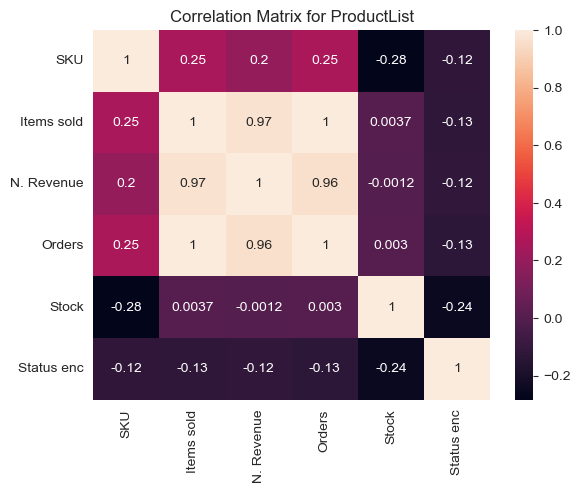

In [389]:
# Create correlation matrix
corr_matrix = df_pl.corr()
display(corr_matrix)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for ProductList')
plt.show()

### Scatter Plot for Predicted Items Sold vs. Actual Items Sold

111 111


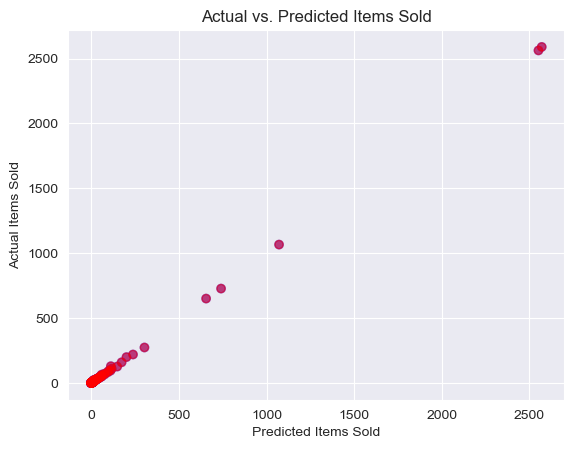

In [390]:
# visualize the best-selling product
# Create a DataFrame from the predicted and actual values
df = pd.DataFrame({'predicted': predicted_items_sold, 'actual': y})
# print(df)

# Check the lengths of 'predicted' and 'actual'
print(len(df['predicted']), len(df['actual']))

# Plot the DataFrame as a scatter plot and make both different colors
colors = ['blue' for _ in range(len(df['predicted']))] + ['red' for _ in range(len(df['actual']))]
plt.scatter(df['predicted'].append(df['predicted']),
                df['actual'].append(df['actual']),
                c=colors,
                alpha=0.5)

# Add a line for perfect correlation.
# y = df['actual']
# plt.plot(np.unique(df['predicted']), np.poly1d(np.polyfit(df['predicted'], y, 1))(np.unique(df['predicted'])))
plt.xlabel('Predicted Items Sold')
plt.ylabel('Actual Items Sold')
plt.title('Actual vs. Predicted Items Sold')
plt.show()

,residuals,predicted
0,19.711533,2570.288467
1,11.307542,2551.692458
2,-3.923627,1070.923627
3,-11.965474,739.965474
4,-3.627350,654.627350


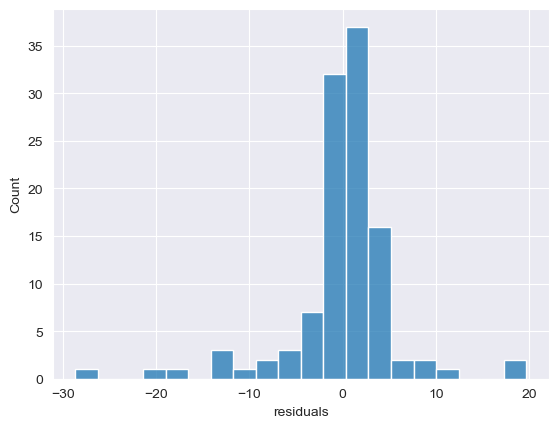

In [391]:
# Visualize the residuals
# Calculate the residuals
residuals = y - predicted_items_sold # residual = actual - predicted

# Create a DataFrame of the residuals
df = pd.DataFrame({'residuals': residuals, 'predicted': predicted_items_sold})
display(df.head())

# Plot the residuals as a histogram
sns.histplot(data=df, x='residuals', bins=20)
plt.show()

# 3. Viability of Monthly Subscription Plan


In [392]:
# Load Order Report Dataset
order_df = pd.read_csv('datasets/OrderReports.csv')

# Remove ',' and 'RM', convert 'N. Revenue (formatted)' to float
order_df['N. Revenue (formatted)'] = order_df['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)

# Convert 'Product(s)' to the count of products sold
order_df['Product Count'] = order_df['Items sold']

# Feature engineering
order_df['Avg Revenue per Item'] = order_df['N. Revenue'] / order_df['Items sold']

# convert State, Customer, Product(s), Gender, Customer type to categorical using label encoder
order_df['State'] = le.fit_transform(order_df['State'])
order_df['Customer'] = le.fit_transform(order_df['Customer'])
order_df['Product(s)'] = le.fit_transform(order_df['Product(s)'])
lb = LabelBinarizer
order_df['Gender'] = le.fit_transform(order_df['Gender'])
order_df['Customer type'] = le.fit_transform(order_df['Customer type'])
order_df['Status'] = le.fit_transform(order_df['Status'])

# convert Date to datetime
order_df['Date'] = pd.to_datetime(order_df['Date'])

# Define 'Interest' column based on certain criteria
interest_threshold = 600
order_df['Interest'] = ((order_df['N. Revenue (formatted)'] > interest_threshold) | (order_df['Product Count'] > 5)).astype(int)

# Define features (X) and target variable (Y)
X = order_df.drop(['Interest', 'Date'], axis=1)  # Exclude 'Date' from features
Y = order_df['Interest']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predictions)
display(f"Accuracy: {accuracy}")

# predict the probability of interest
probabilities = model.predict_proba(X_test)
display(probabilities)

# predict the probability of interest for each customer
order_df['Probability of Interest'] = model.predict_proba(order_df.drop(['Interest', 'Date'], axis=1))[:, 1]
display(order_df.head())



'Accuracy: 0.9968808484092326'

array([[9.97148695e-01, 2.85130543e-03],
       [9.99999969e-01, 3.05042806e-08],
       [9.99999965e-01, 3.53672626e-08],
       ...,
       [9.99999851e-01, 1.48960025e-07],
       [1.00000000e+00, 2.50575537e-10],
       [9.95288565e-01, 4.71143500e-03]])

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender,Product Count,Avg Revenue per Item,Interest,Probability of Interest
0,2023-10-26 14:50:17,16698.0,57.8,1,19,0,398,2.0,49.8,8,36,0,2.0,24.9,0,8.364460e-07
1,2023-10-26 13:53:47,16697.0,32.9,1,1991,0,259,1.0,24.9,0,25,0,1.0,24.9,0,2.561875e-08
2,2023-10-26 13:04:17,16696.0,32.9,1,6993,0,259,1.0,24.9,4,31,0,1.0,24.9,0,2.550155e-08
3,2023-10-26 13:00:49,16695.0,82.7,1,1763,0,366,3.0,74.7,2,31,0,3.0,24.9,0,4.291531e-06
4,2023-10-26 12:47:36,16694.0,32.9,1,6114,0,370,1.0,24.9,9,38,0,1.0,24.9,0,3.849441e-08


In [393]:
# predict the viability of monthly subscription plan
order_df['Viability of Monthly Subscription Plan'] = (order_df['Probability of Interest'] > 0.5).astype(int)
display(order_df.head())
order_df.to_csv('datasets/ViabilityOfMonthlySubscription.csv', index= False, header= True)

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender,Product Count,Avg Revenue per Item,Interest,Probability of Interest,Viability of Monthly Subscription Plan
0,2023-10-26 14:50:17,16698.0,57.8,1,19,0,398,2.0,49.8,8,36,0,2.0,24.9,0,8.364460e-07,0
1,2023-10-26 13:53:47,16697.0,32.9,1,1991,0,259,1.0,24.9,0,25,0,1.0,24.9,0,2.561875e-08,0
2,2023-10-26 13:04:17,16696.0,32.9,1,6993,0,259,1.0,24.9,4,31,0,1.0,24.9,0,2.550155e-08,0
3,2023-10-26 13:00:49,16695.0,82.7,1,1763,0,366,3.0,74.7,2,31,0,3.0,24.9,0,4.291531e-06,0
4,2023-10-26 12:47:36,16694.0,32.9,1,6114,0,370,1.0,24.9,9,38,0,1.0,24.9,0,3.849441e-08,0


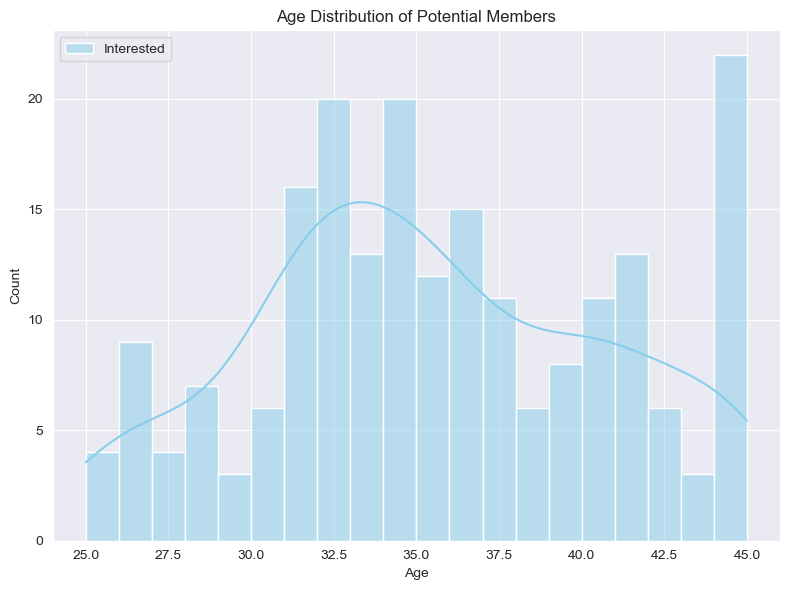

In [394]:
# Example 1: Age Distribution of Potential Members
plt.figure(figsize=(8, 6))
sns.histplot(order_df[order_df['Interest'] == 1]['Age'], bins=20, kde=True, color='skyblue', label='Interested')
plt.title('Age Distribution of Potential Members')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


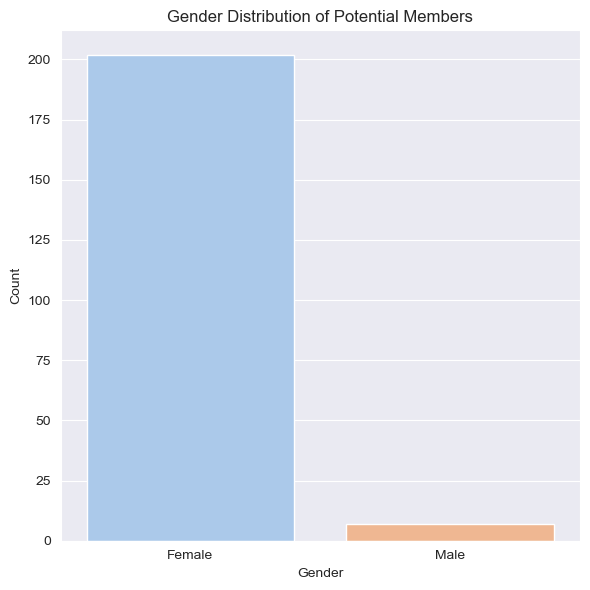

In [395]:
# Example 2: Gender Distribution of Potential Members
plt.figure(figsize=(6, 6))
order_df_interested = order_df[order_df['Interest'] == 1]
sns.countplot(x='Gender', data=order_df_interested, palette='pastel')
plt.title('Gender Distribution of Potential Members')
plt.xlabel('Gender')
plt.xticks(np.arange(0, 2), ['Female', 'Male'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

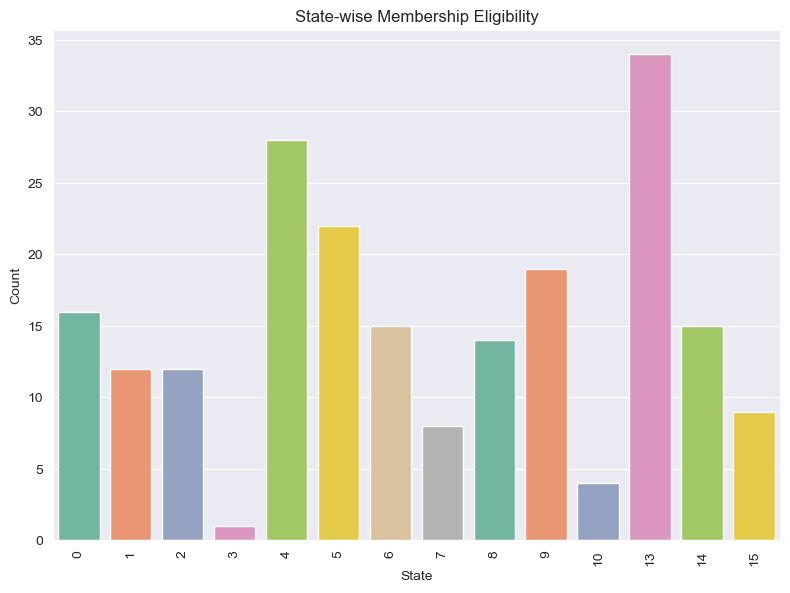

In [396]:
# Example 3: State-wise Membership Eligibility
plt.figure(figsize=(8, 6))
sns.countplot(x='State', data=order_df_interested, palette='Set2')
plt.title('State-wise Membership Eligibility')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

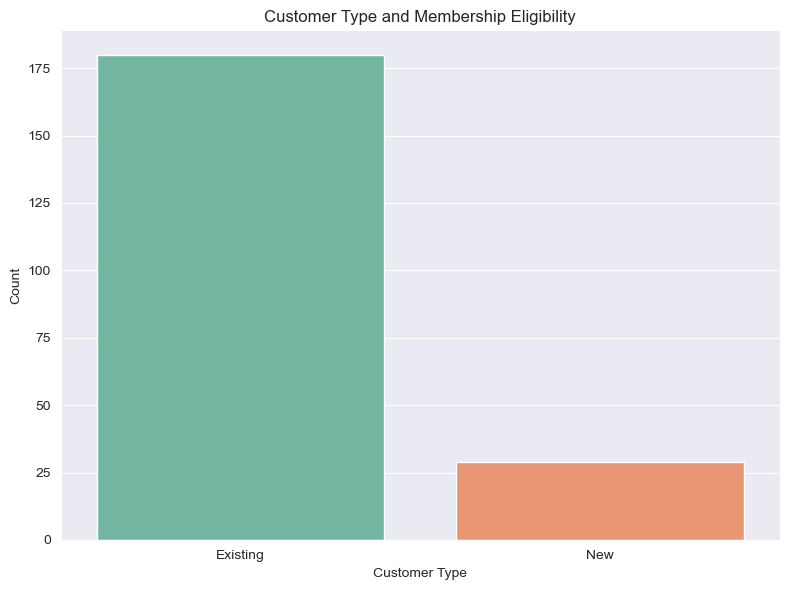

In [397]:
# Example 4: Customer Type and Membership Eligibility
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=order_df_interested, palette='Set2')
plt.title('Customer Type and Membership Eligibility')
plt.xlabel('Customer Type')
plt.ylabel('Count')
# legend for customer type
plt.xticks(np.arange(0, 2), ['Existing', 'New'])
plt.tight_layout()
plt.show()

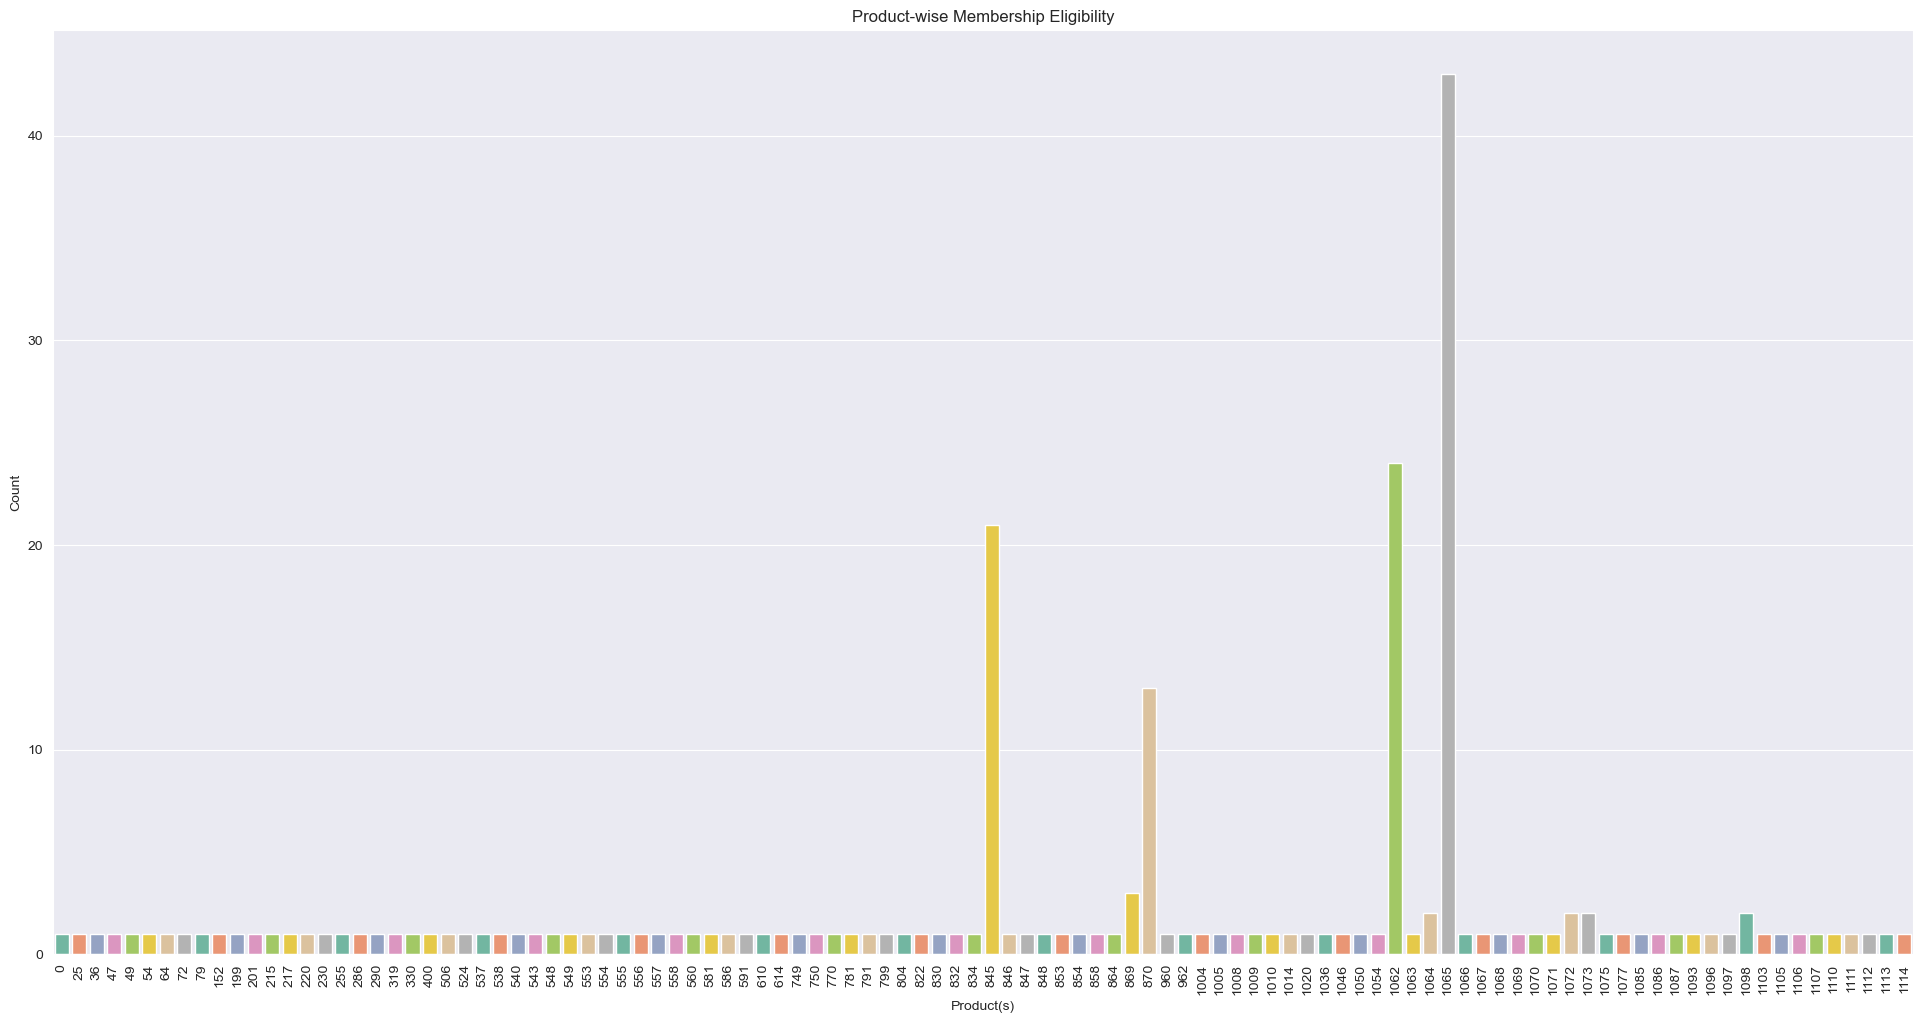

In [398]:
# Example 5: Product-wise Membership Eligibility (DEEETING SOON)
# make figure bigger than 8, 6
plt.figure(figsize=(24, 12))
sns.countplot(x='Product(s)', data=order_df_interested, palette='Set2')
plt.title('Product-wise Membership Eligibility')
plt.xlabel('Product(s)')
plt.xticks(rotation=90)
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

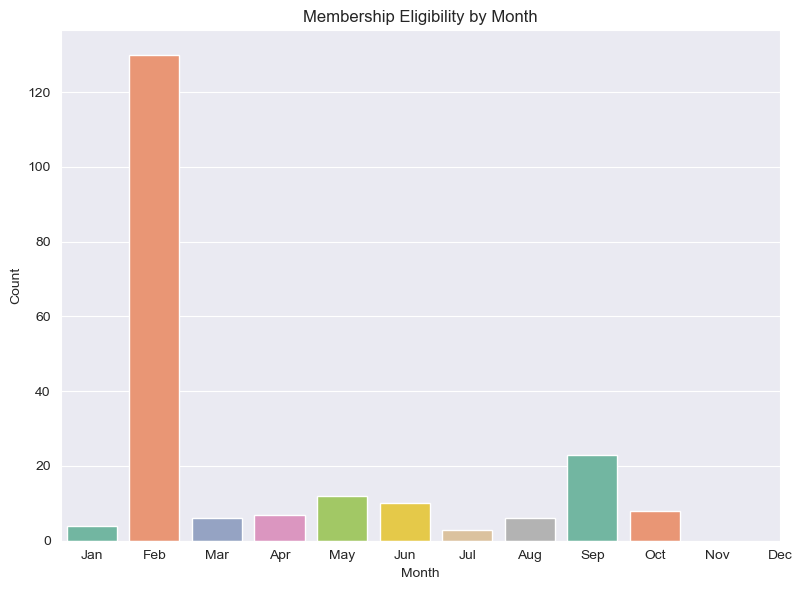

In [399]:
# Example 6: Membership Eligibility by Month
plt.figure(figsize=(8, 6))
sns.countplot(x=order_df_interested['Date'].dt.month, data=order_df_interested, palette='Set2')
plt.title('Membership Eligibility by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
# legend for month
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', "Nov", 'Dec'])
plt.show()

# 4. Finding the Best Place to Open a New Branch: K-Means Clustering

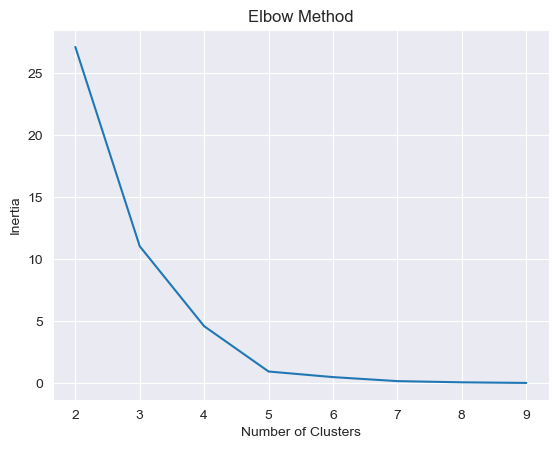

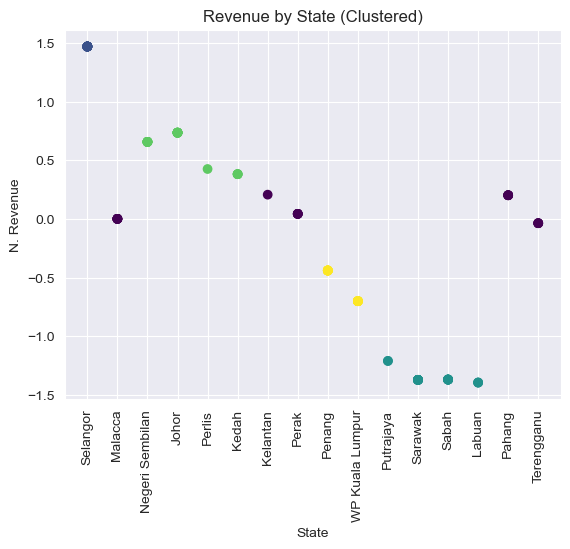

0.8399461970206005
              State  N. Revenue (formatted)                       Malls  \
54           Penang               -0.440165                Gurney Plaza   
55           Penang               -0.440165              Queensbay Mall   
56           Penang               -0.440165         Gurney Paragon Mall   
57           Penang               -0.440165             1st Avenue Mall   
58           Penang               -0.440165                Prangin Mall   
59           Penang               -0.440165        Sunway Carnival Mall   
60           Penang               -0.440165         Penang Times Square   
61           Penang               -0.440165     AEON Seberang Prai City   
62           Penang               -0.440165  Straits Quay Retail Marina   
63  WP Kuala Lumpur               -0.701530         Mid Valley Megamall   
64  WP Kuala Lumpur               -0.701530           The Gardens Mall    
65  WP Kuala Lumpur               -0.701530                 Pavilion KL   
66  WP

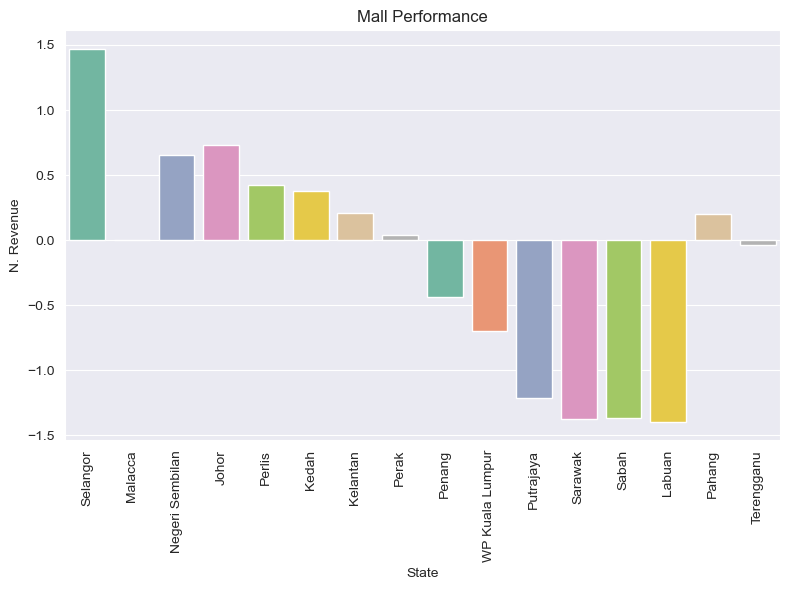

In [400]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Order Report and Malaysia Malls Datasets
order_df = pd.read_csv('datasets/OrderReports.csv')
malls_df = pd.read_csv('datasets/Malaysia Malls.csv')

order_df['N. Revenue (formatted)'] = order_df['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)
# Customer Geographic Analysis
state_sales = order_df.groupby('State')['N. Revenue (formatted)'].sum().reset_index()

# Combine Mall and Revenue data
mall_performance = pd.merge(state_sales, malls_df, how='right', left_on='State', right_on='State')

# Feature scaling
scaler = StandardScaler()
mall_performance[['N. Revenue (formatted)']] = scaler.fit_transform(mall_performance[['N. Revenue (formatted)']])

# # identify missing values
# print(mall_performance.isnull().sum())

# fill missing values
mall_performance['N. Revenue (formatted)'] = mall_performance['N. Revenue (formatted)'].fillna(mall_performance['N. Revenue (formatted)'].mean())

tune = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_performance[['N. Revenue (formatted)']])
    tune.append(kmeans.inertia_)
    
plt.plot(range(2, 10), tune)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You may adjust the number of clusters
mall_performance['Cluster'] = kmeans.fit_predict(mall_performance[['N. Revenue (formatted)']])
# print(mall_performance.head())

# Visualize
plt.scatter(mall_performance['State'], mall_performance['N. Revenue (formatted)'], c=mall_performance['Cluster'], cmap='viridis')
plt.title('Revenue by State (Clustered)')
plt.xlabel('State')
# 90 degree rotation
plt.xticks(rotation=90)
plt.ylabel('N. Revenue')
plt.show()
# Evaluate the model
print(silhouette_score(mall_performance[['N. Revenue (formatted)']], mall_performance['Cluster']))

# Suggest Malls to Open New Branches
print(mall_performance[mall_performance['Cluster'] == 4])
print(mall_performance[mall_performance['Cluster'] == 3])
print(mall_performance[mall_performance['Cluster'] == 2])
print(mall_performance[mall_performance['Cluster'] == 1])
print(mall_performance[mall_performance['Cluster'] == 0])

# Barchart for mall performance
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='N. Revenue (formatted)', data=mall_performance, palette='Set2')
plt.title('Mall Performance')
plt.xlabel('State')
plt.ylabel('N. Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# # Barchart for mall performance by cluster
# plt.figure(figsize=(8, 6))
# sns.barplot(x='State', y='N. Revenue (formatted)', data=mall_performance, hue='Cluster', palette='Set2')
# plt.title('Mall Performance by Cluster')
# plt.xlabel('State')
# plt.ylabel('N. Revenue')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()
# 
# # Scatterplot for mall performance by cluster
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='State', y='N. Revenue (formatted)', data=mall_performance, hue='Cluster', palette='Set2')
# plt.title('Mall Performance by Cluster')
# plt.xlabel('State')
# plt.ylabel('N. Revenue')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()




